# DNA methylation data analysis

###  Bioconductor 
- Edx 자료 - PH525x series - Biomedical Data Science ( http://genomicsclass.github.io/book )
- Jupyter와 R 연동 방법 : http://www.walkingrandomly.com/?p=5734 

## 01. Analyzing DNA methylation data
- 이번절에서는 methylation data을 분석하는 예제를 볼것임.
- TCGA( http://cancergenome.nih.gov/ )로부터 대장암 데이터를 가지고 와서 사용할 것임.
- 이 데이터는 Illumina 450K array 장비에서 생성되었고, raw data를 처리해서 methylation measurements 갖는 matrix을 만들었음.
- matrix을 만드는 스크립트는 아래 URL로 제공함.
- https://github.com/genomicsclass/labs/blob/master/Rscripts/read_tcga_meth.R

---------------------------------------------------------------------------------
- 데이터를 로딩하는것부터 시작해보자.

In [1]:
source("http://bioconductor.org/biocLite.R")

Bioconductor version 3.1 (BiocInstaller 1.18.4), ?biocLite for help


In [ ]:
devtools::install_github("genomicsclass/coloncancermeth")

In [2]:
library(coloncancermeth)
data(coloncancermeth)

- 아래와 같이 3가지의 테이블이 포함됨.
- methylation data 정보 테이블,
- data matrix의 컬럼과 샘플에 대한 정보 테이블, 
- CpGs의 genomic location를 갖는 granges object 테이블

In [3]:
dim(meth) ##this is the methylation data
head(meth)

[1] 485512     26

[,1]       [,2]       [,3]       [,4]       [,5]       [,6]
cg13869341 0.80189627 0.84820056 0.91330487 0.91118459 0.91689483 0.90106688
cg14008030 0.61478121 0.61560110 0.63670777 0.64317777 0.62336749 0.59980668
cg12045430 0.11438085 0.03904616 0.04136764 0.09394642 0.07269811 0.13816684
cg20826792 0.20335235 0.17257738 0.16484079 0.23872555 0.21039685 0.23801345
cg00381604 0.02281038 0.01515388 0.01719277 0.01013396 0.02490950 0.02346244
cg20253340 0.49589955 0.44247052 0.59976612 0.50785954 0.68070526 0.61669142
                 [,7]      [,8]       [,9]      [,10]      [,11]      [,12]
cg13869341 0.84637928 0.8730147 0.87589047 0.82758943 0.90379856 0.91557009
cg14008030 0.64426741 0.6191857 0.68020585 0.62645319 0.67373124 0.65554469
cg12045430 0.04948783 0.1357724 0.06251754 0.07096331 0.17751723 0.05828971
cg20826792 0.23002835 0.2212497 0.19094443 0.20003697 0.24797638 0.22812237
cg00381604 0.01860108 0.0336156 0.02671120 0.02516623 0.02796351 0.02796251
cg20253340 0.59892918 0.6346261 0.62769540 0.53609584 0.33265818 0.41548606
                 [,13]      [,14]       [,15]      [,16]      [,17]      [,18]
cg13869341 0.845423709 0.87065777 0.820037412 0.82453605 0.79642178 0.87696345
cg14008030 0.686008617 0.71166471 0.703793470 0.66822359 0.60180810 0.63286592
cg12045430 0.071368940 0.13150685 0.109661418 0.06757839 0.14048016 0.03738489
cg20826792 0.163881187 0.20645467 0.168288671 0.19204924 0.25529503 0.17770515
cg00381604 0.000564922 0.01401077 0.007879628 0.00774602 0.00634657 0.01714607
cg20253340 0.578003227 0.49463907 0.414119156 0.47373026 0.57247962 0.50626762
                [,19]       [,20]      [,21]      [,22]      [,23]      [,24]
cg13869341 0.83803809 0.832782290 0.84390332 0.83729545 0.83847790 0.90578217
cg14008030 0.60679030 0.532390403 0.62885444 0.65381514 0.72844764 0.65322792
cg12045430 0.07616361 0.046671199 0.12254649 0.10319721 0.07805903 0.13171919
cg20826792 0.17799545 0.220991442 0.20660929 0.23432243 0.16869898 0.22430095
cg00381604 0.01267540 0.007061784 0.03182807 0.01991788 0.02046740 0.02145729
cg20253340 0.32933520 0.567039796 0.55096351 0.49824183 0.41143722 0.52947718
                [,25]      [,26]
cg13869341 0.88431366 0.81907827
cg14008030 0.60671540 0.66447558
cg12045430 0.10380573 0.12207345
cg20826792 0.20464185 0.26663694
cg00381604 0.01139753 0.01280063
cg20253340 0.52022202 0.46761104

In [4]:
dim(pd) ##this is sample information
head(pd, n=1)

Loading required package: IRanges
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from 'package:stats':

    xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, intersect,
    is.unsorted, lapply, Map, mapply, match, mget, order, paste, pmax,
    pmax.int, pmin, pmin.int, Position, rank, rbind, Reduce, rep.int,
    rownames, sapply, setdiff, sort, table, tapply, union, unique,
    unlist, unsplit

Loading required package: S4Vectors
Loading required package: stats4
Creating a generic function for 'nchar' from package 'base' in pa

NULL

DataFrame with 1 row and 105 columns
  bcr_patient_barcode                      bcr_sample_uuid bcr_sample_barcode
          <character>                          <character>        <character>
1        TCGA-A6-2679 1fcb9c83-18cb-42a4-8769-fddb3541c95d   TCGA-A6-2679-01A
  NCNNCT_OthMethONSP current_weight days_to_collection
         <character>    <character>        <character>
1        [Completed] [Not Reported]     [Not Reported]
  days_to_sample_procurement freezing_method initial_weight
                 <character>     <character>    <character>
1             [Not Reported] [Not Requested] [Not Reported]
  intermediate_dimension longest_dimension lymphatic_invasion margins_involved
             <character>       <character>        <character>      <character>
1                 0.6 cm            1.2 cm   [Not Applicable]   [Not Reported]
  method_of_sample_procurement number_regional_lymphnodes_exam
                   <character>                     <character>
1                  [C

In [5]:
length(gr)
head(gr)

Loading required package: GenomicRanges
Loading required package: GenomeInfoDb


[1] 485512

GRanges object with 6 ranges and 0 metadata columns:
             seqnames         ranges strand
                <Rle>      <IRanges>  <Rle>
  cg13869341     chr1 [15865, 15865]      *
  cg14008030     chr1 [18827, 18827]      *
  cg12045430     chr1 [29407, 29407]      *
  cg20826792     chr1 [29425, 29425]      *
  cg00381604     chr1 [29435, 29435]      *
  cg20253340     chr1 [68849, 68849]      *
  -------
  seqinfo: 24 sequences from hg19 genome; no seqlengths

- pd 객체에는 임상정보가 포함됨. 대장암 샘플인지, 일반조직 샘플인지 구분하는 컬럼이 있음.

In [6]:
colnames(pd)

[1] "bcr_patient_barcode"                                              
  [2] "bcr_sample_uuid"                                                  
  [3] "bcr_sample_barcode"                                               
  [4] "NCNNCT_OthMethONSP"                                               
  [5] "current_weight"                                                   
  [6] "days_to_collection"                                               
  [7] "days_to_sample_procurement"                                       
  [8] "freezing_method"                                                  
  [9] "initial_weight"                                                   
 [10] "intermediate_dimension"                                           
 [11] "longest_dimension"                                                
 [12] "lymphatic_invasion"                                               
 [13] "margins_involved"                                                 
 [14] "method_of_sample_procurement"                                     
 [15] "number_regional_lymphnodes_exam"                                  
 [16] "number_regional_lymphnodes_pos"                                   
 [17] "oct_embedded"                                                     
 [18] "pathology_report_uuid"                                            
 [19] "primary_or_metastatic_status"                                     
 [20] "sample_type"                                                      
 [21] "sample_type_id"                                                   
 [22] "shortest_dimension"                                               
 [23] "time_between_clamping_and_freezing"                               
 [24] "time_between_excision_and_freezing"                               
 [25] "venous_invasion"                                                  
 [26] "verification_by_bcr"                                              
 [27] "vial_number.sample"                                               
 [28] "bcr_patient_barcode.tumor"                                        
 [29] "tumor_necrosis_percent"                                           
 [30] "tumor_nuclei_percent"                                             
 [31] "tumor_weight"                                                     
 [32] "vial_number.tumor"                                                
 [33] "bcr_patient_barcode.normal"                                       
 [34] "days_to_normal_sample_procurement"                                
 [35] "method_of_normal_sample_procurement"                              
 [36] "normal_control_type"                                              
 [37] "normal_tissue_anatomic_site"                                      
 [38] "normal_tissue_proximity"                                          
 [39] "vial_number"                                                      
 [40] "ncedna_dna_conc"                                                  
 [41] "ncedna_dna_qm"                                                    
 [42] "ncedna_dna_qty"                                                   
 [43] "ncedna_dna_vol"                                                   
 [44] "patient.age_at_initial_pathologic_diagnosis"                      
 [45] "patient.ajcc_cancer_staging_handbook_edition"                     
 [46] "patient.anatomic_organ_subdivision"                               
 [47] "patient.anatomic_site_colorectal"                                 
 [48] "patient.bcr_patient_uuid"                                         
 [49] "patient.braf_gene_analysis_performed"                             
 [50] "patient.braf_gene_analysis_result"                                
 [51] "patient.circumferential_resection_margin"                         
 [52] "patient.colon_polyps_present"                                     
 [53] "patient.date_of_form_completion"                                  
 [54] "patient.date_of_initial_pathologic_diagnosis"                     
 [55] 

In [7]:
table(pd$Status)


normal cancer 
     9     17 

In [8]:
normalIndex <- which(pd$Status=="normal")
head( normalIndex )

[1]  2  3  5  7  9 12

In [9]:
cancerlIndex <- which(pd$Status=="cancer")
head( cancerlIndex )

[1]  1  4  6  8 10 11

- 일반조직 샘플의 methylation measurements 의 분포와  대장암 샘플의 분포도 같이 보자.
- 주석 => 모든 분석의 시작은 주어진 데이터이 분포 형태를 파악하는 것임.


Call:
	density.default(x = meth[, i], from = 0, to = 1)

Data: meth[, i] (485512 obs.);	Bandwidth 'bw' = 0.02196

       x              y         
 Min.   :0.00   Min.   :0.2083  
 1st Qu.:0.25   1st Qu.:0.5749  
 Median :0.50   Median :0.6807  
 Mean   :0.50   Mean   :0.9693  
 3rd Qu.:0.75   3rd Qu.:1.2958  
 Max.   :1.00   Max.   :2.5015  

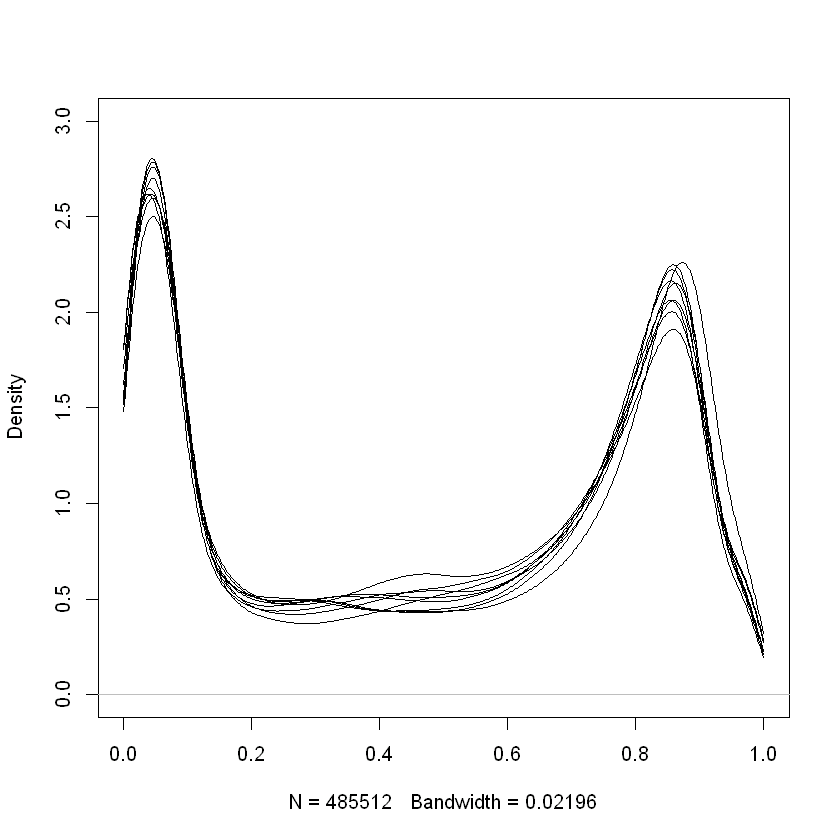

In [10]:
i=normalIndex[1]

density(meth[,i],from=0,to=1)

plot(density(meth[,i],from=0,to=1),main="",ylim=c(0,3),type="n")
for(i in normalIndex){
  lines(density(meth[,i],from=0,to=1),col=1)
}

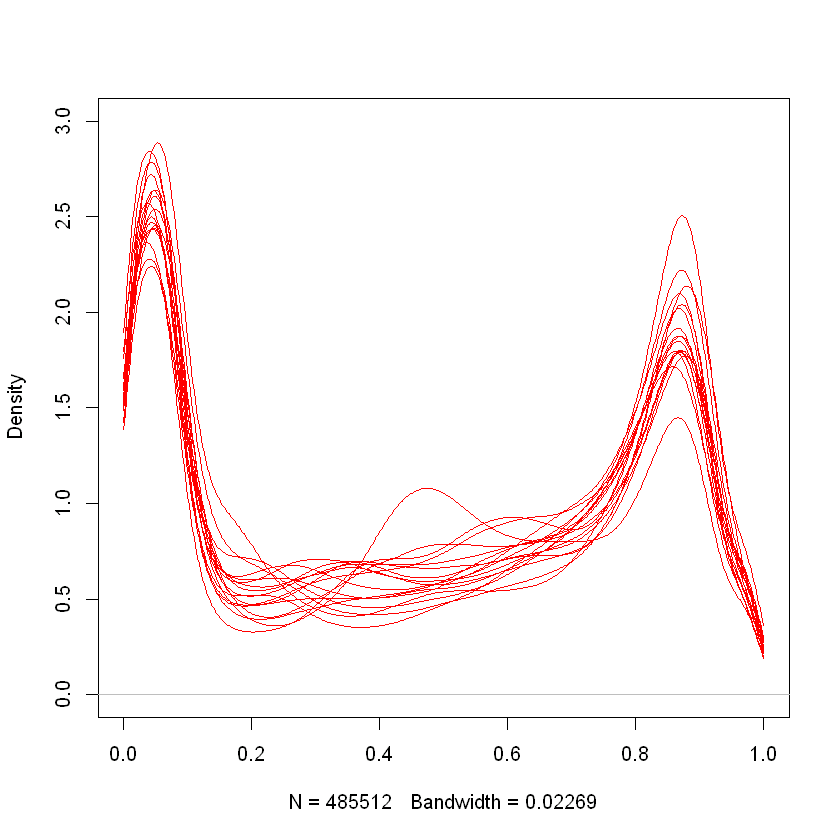

In [11]:
plot(density(meth[,i],from=0,to=1),main="",ylim=c(0,3),type="n")
for(i in cancerlIndex){
  lines(density(meth[,i],from=0,to=1),col=2)
}

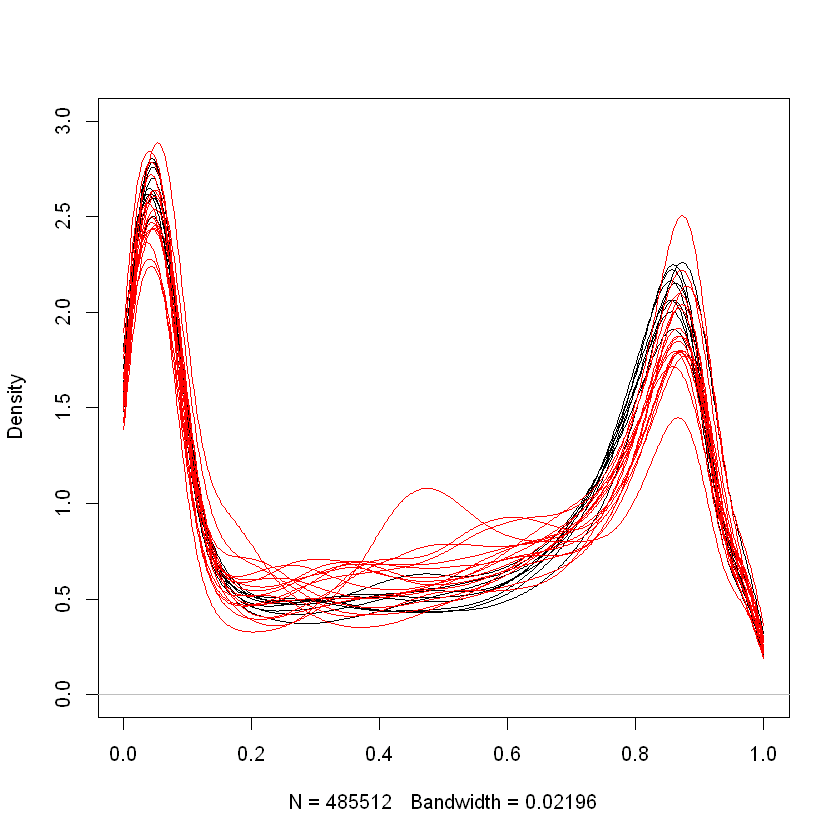

In [12]:
i=normalIndex[1]
plot(density(meth[,i],from=0,to=1),main="",ylim=c(0,3),type="n")
for(i in normalIndex){
  lines(density(meth[,i],from=0,to=1),col=1)
}

for(i in cancerlIndex){
  lines(density(meth[,i],from=0,to=1),col=2)
}

- 암세포와 정상세포간의 차이가 있는 genome의 위치를 찾는것에 관심이 있음.
- 추론적인 방법으로 처리하기 때문에 지속적으로 차이가 있는 위치를 원함.
- 각각의 CpG 에 대해서 t-통계량을 계산해보자.

In [13]:
library(limma)
X<-model.matrix(~pd$Status)
fit<-lmFit(meth,X)
eb <- ebayes(fit)


Attaching package: 'limma'

The following object is masked from 'package:BiocGenerics':

    plotMA



- volcano plot 그려서 차이들을 확인해보자.

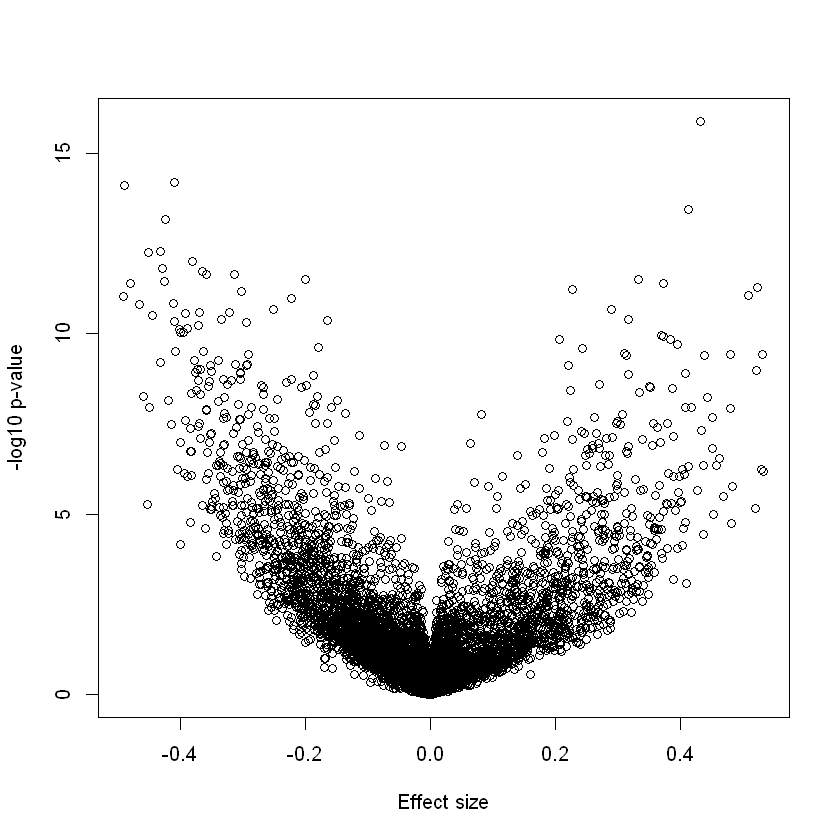

In [14]:
library(rafalib)
splot(fit$coef[,2],-log10(eb$p.value[,2]),xlab="Effect size",ylab="-log10 p-value")

- DNA methylation이 단지 하나의 CpG라도 genome발현위치에서 gene 발현에 영향을 준다고 여겨짐.
- top hit 주변의 위치를 plot함.

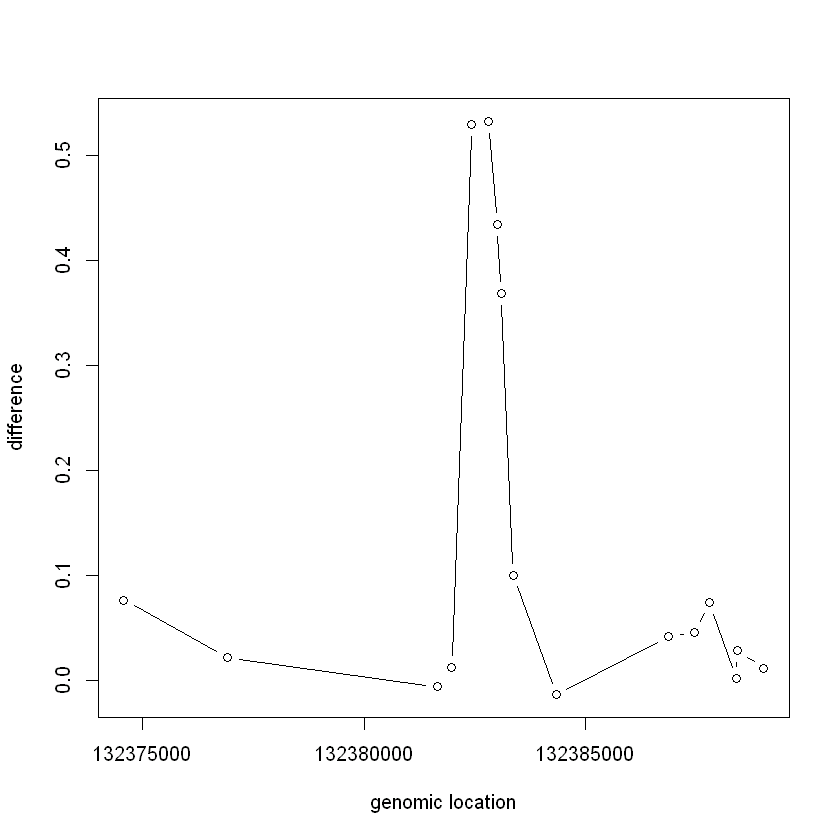

In [15]:
library(GenomicRanges)
i <- which.min(eb$p.value[,2])
middle <- gr[i,]
Index <- gr%over%(middle+10000)
pos = start(gr)

plot(pos[Index],fit$coef[Index,2],type="b",xlab="genomic location",ylab="difference")

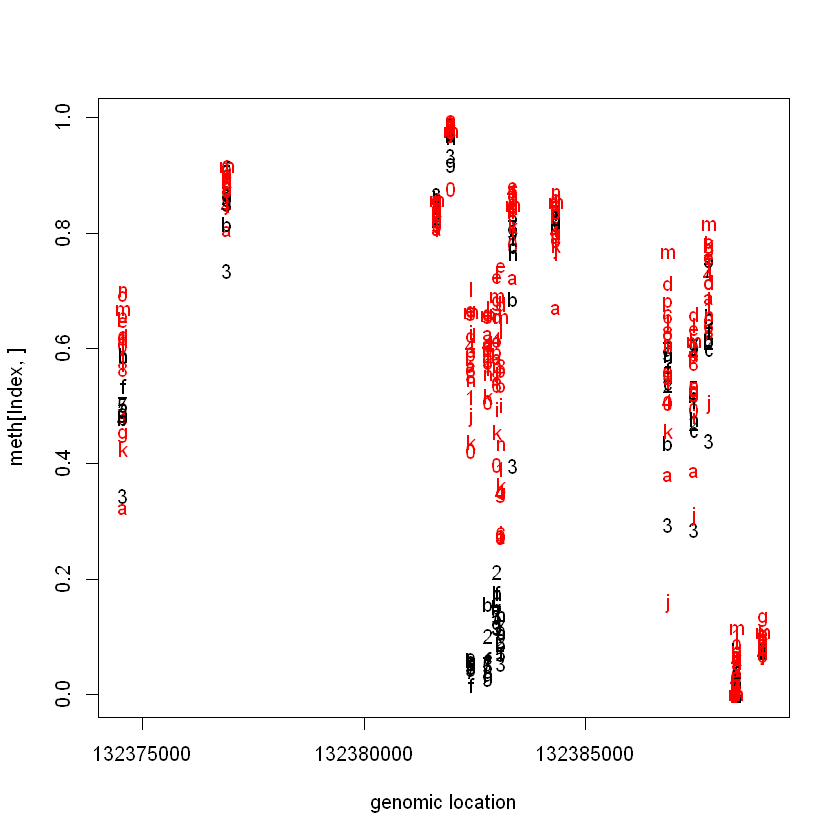

In [16]:
cols = ifelse(pd$Status=="normal",1,2)
matplot(pos[Index],meth[Index,],col=cols,xlab="genomic location")

- 그림으로 명시적으로 발현의 차이가 있는 위치를 알아볼 수 있음.
- regional analysis을 수행할려면,  region에 대한 정의가 필요함.
- 그러나, 한 가지 문제점이 있음 => chromosome별로 분석을 나눌뿐만 아니라, 각각의 chromosome안에서도 분석할 region의 서브그룹으로 만드는 큰 gap을 가지고 있음.

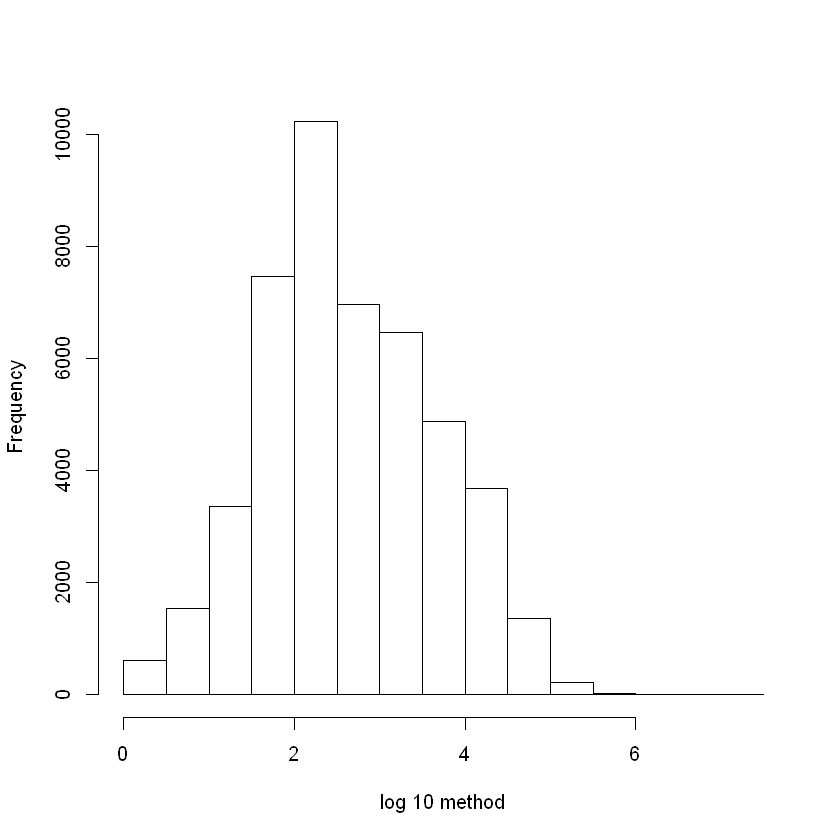

In [17]:
chr = as.factor(seqnames(gr))
chr1Index <- which(chr=="chr1")
hist(log10(diff(pos[chr1Index])),main="",xlab="log 10 method")

- 아래 과정을 거치면 group들을 나눌 수 있음.

- bumphunter :  Tools for finding bumps in genomic data 
- clusterMaker : Genomic locations are grouped into clusters based on distance: locations that are close to each other are assigned to the same cluster. The operation is performed on each chromosome independently.

In [ ]:
biocLite("bumphunter")

In [18]:
library(bumphunter)
cl=clusterMaker(chr,pos,maxGap=500)
table(table(cl)) ##shows the number of regions with 1,2,3, ... points in them

Loading required package: foreach
Loading required package: iterators
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22



     1      2      3      4      5      6      7      8      9     10     11 
141457  18071  13227   6473   5144   3748   2517   2135   2029   1878   1792 
    12     13     14     15     16     17     18     19     20     21     22 
  1570   1269    933    684    472    337    240    181     99    113     62 
    23     24     25     26     27     28     29     30     31     32     33 
    57     42     36     39     26     17     21     19     12     12     12 
    34     35     36     37     38     39     40     41     42     43     44 
     7      7     12      3      9      4      5      7      7      9      7 
    45     46     48     49     50     51     52     53     54     55     56 
     7      8      3      5      5      2      1      5      2      4      1 
    57     58     59     60     61     62     63     64     65     67     68 
     1      3      2      1      4      3      4      1      2      2      1 
    70     71     73     74     76     78     80     82     83 

- 암과 정상 세포의 region들에 대해서 확인해보자.

[1] 360649 360650 360651 360652 360653 360654 360655 360656 360657 360658
[11] 360659 360660 360661 360662 360663 360664

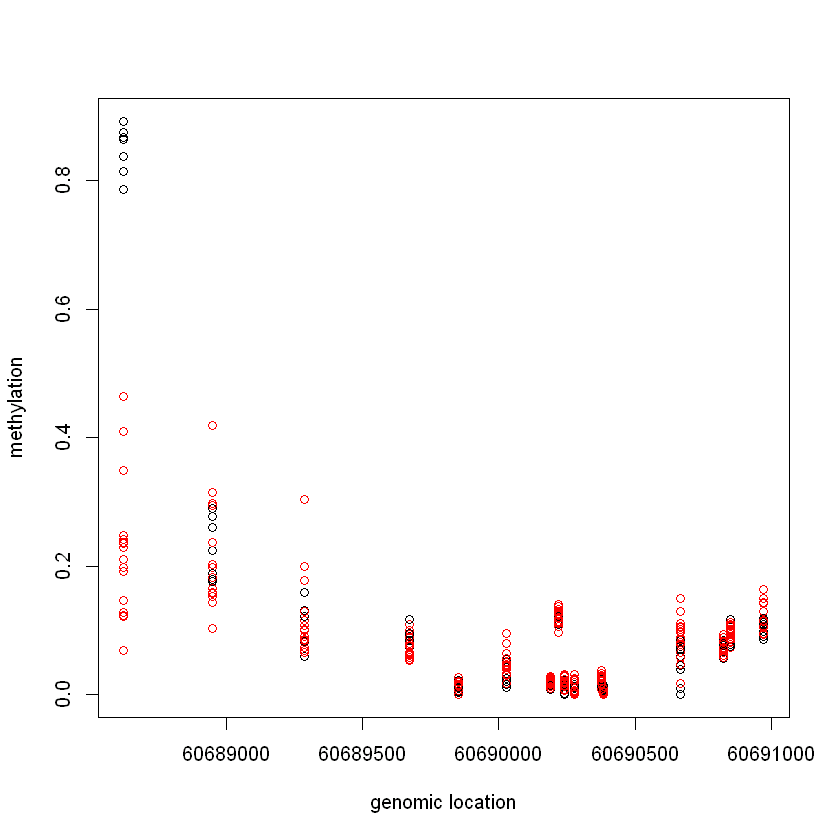

In [19]:
### Select the region with the smallest value
Index<- which(cl==cl[which.min(fit$coef[,2])])
Index
matplot(pos[Index],meth[Index,],col=cols,pch=1,xlab="genomic location",ylab="methylation")

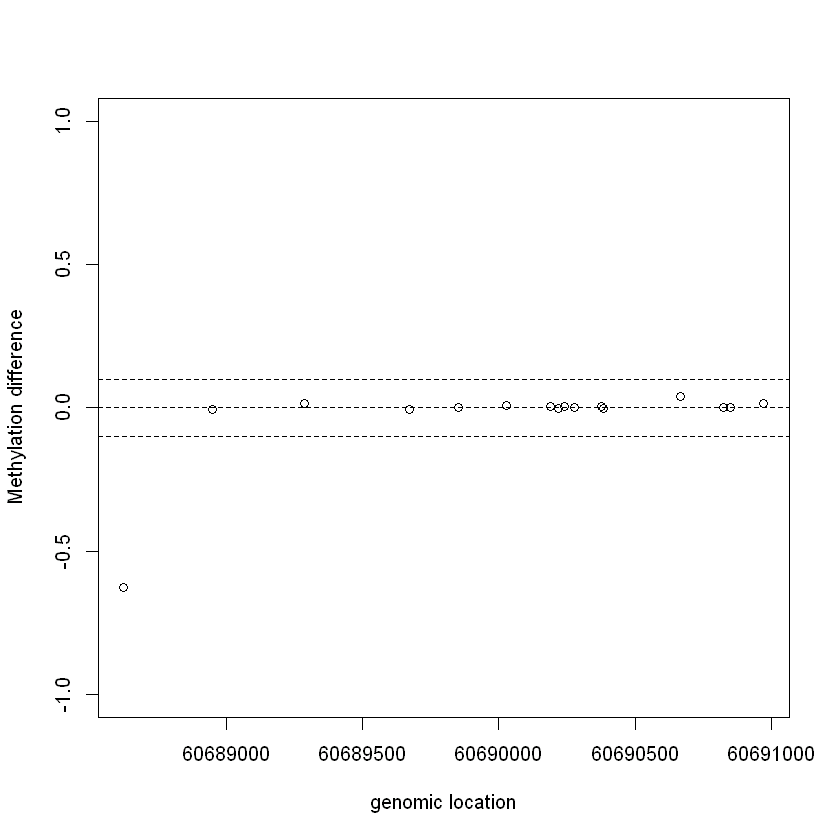

In [20]:
x1=pos[Index]
y1=fit$coef[Index,2]
plot(x1,y1,xlab="genomic location",ylab="Methylation difference",ylim=c(-1,1))
abline(h=0,lty=2)
abline(h=c(-.1,.1),lty=2)

- region들에서 단지 하나의 CpG가 차이가 있다고 보여주고 있음.
- 이와 대조되는 region에 주목하자.

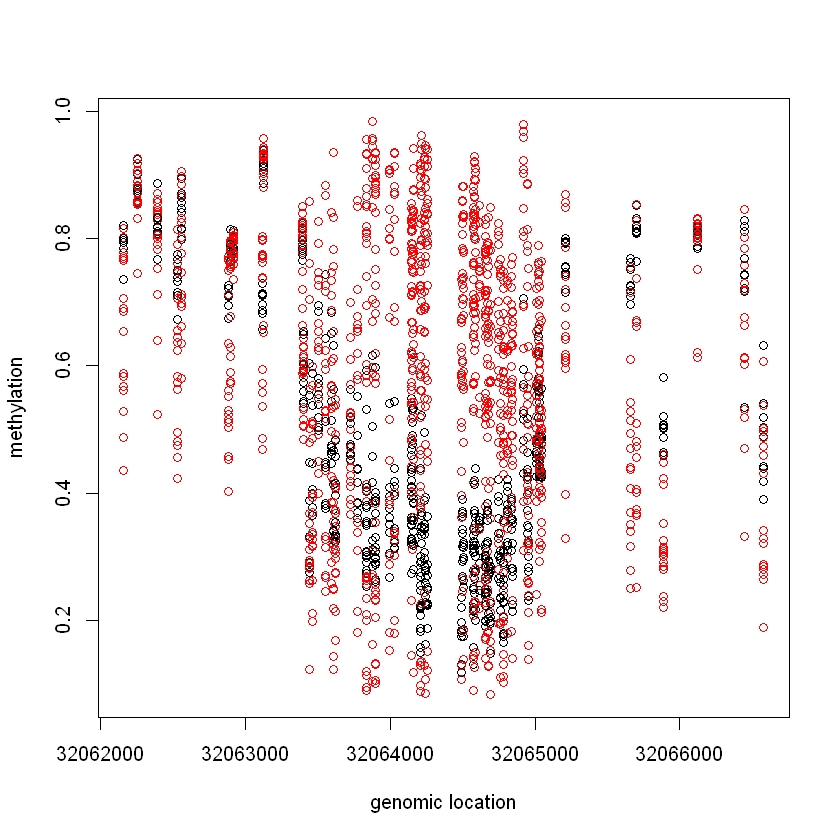

In [21]:
Index=which(cl==72201) ##we know this is a good example from analysis we have already performed

matplot(pos[Index],meth[Index,],col=cols,pch=1,xlab="genomic location",ylab="methylation")

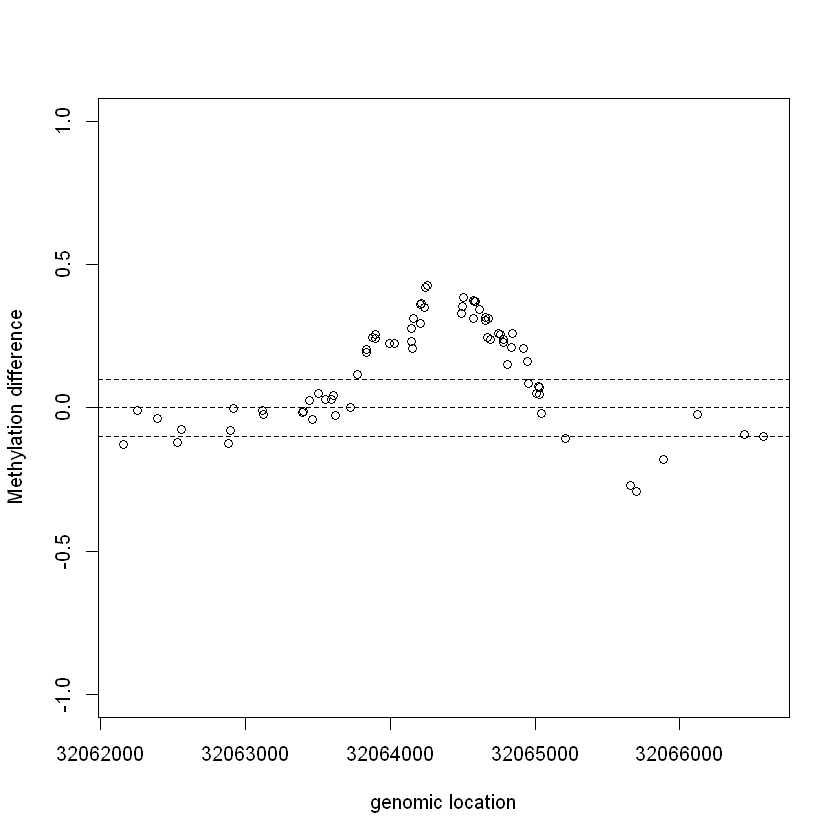

In [22]:
x2=pos[Index]
y2=fit$coef[Index,2]
plot(x2,y2,xlab="genomic location",ylab="Methylation difference",ylim=c(-1,1))
abline(h=0,lty=2)
abline(h=c(-.1,.1),lty=2)

- 하나의 지점내에서 region의 우선 순위에 관심이 있다면, 다른 점근방법이 필요함.
- 참인 신호가 smooth 하다고 가정하면, loess와 같은 통계적인 smoothing 기법은 사용함.
- https://en.wikipedia.org/wiki/Local_regression
- 전체 region들과 특정 region 에서의 예제임.

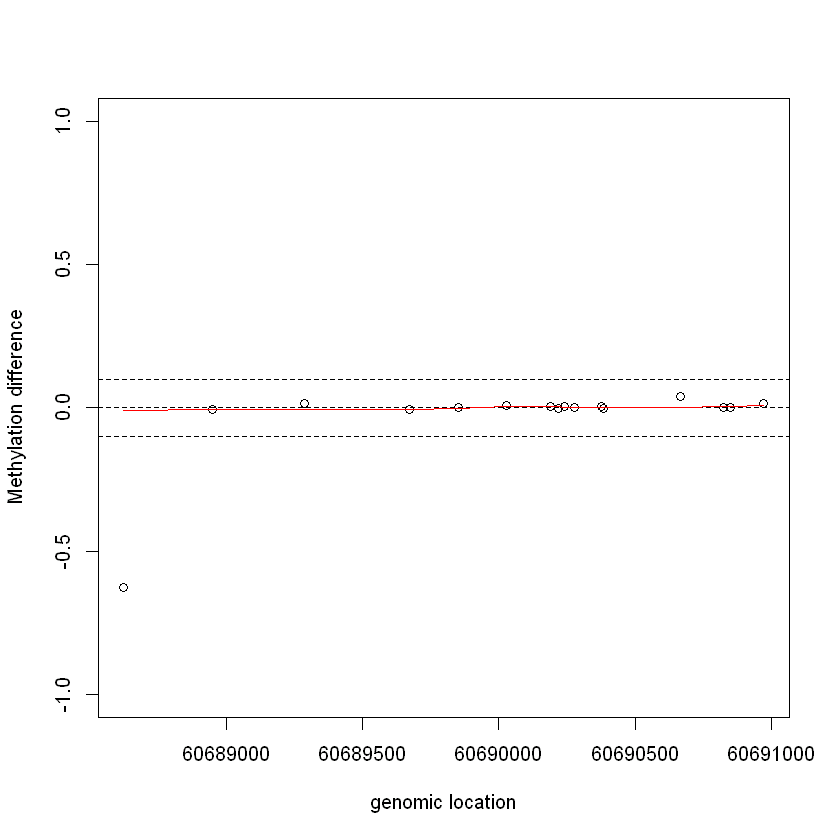

In [23]:
lfit <- loess(y1~x1,degree=1,family="symmetric",span=1/2)
plot(x1,y1,xlab="genomic location",ylab="Methylation difference",ylim=c(-1,1))
abline(h=c(-.1,0,.1),lty=2)
lines(x1,lfit$fitted,col=2)

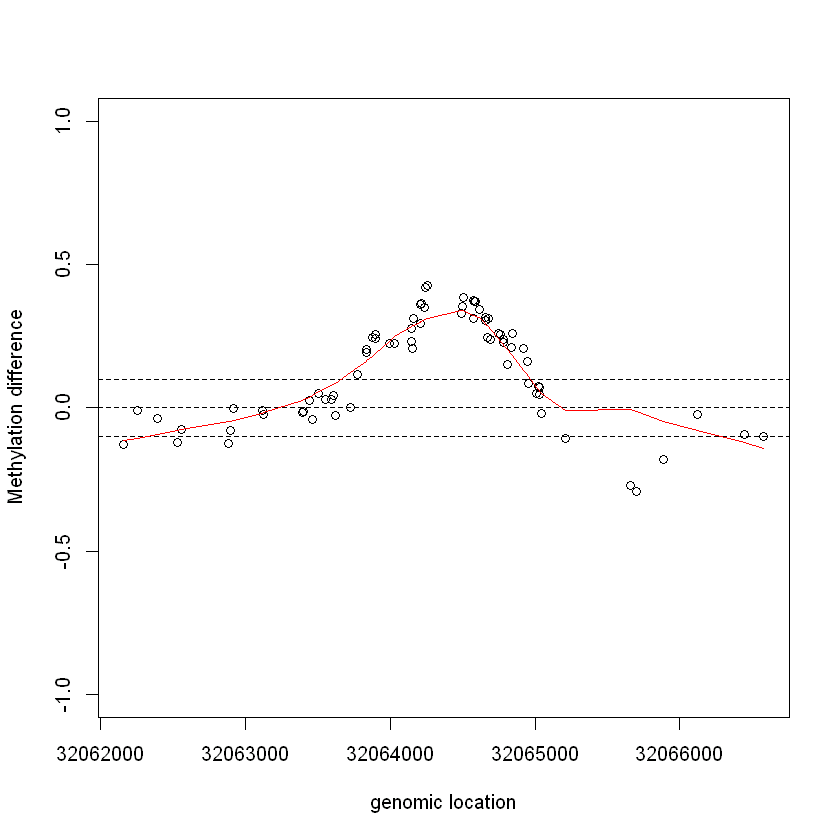

In [24]:
lfit <- loess(y2~x2,degree=1,family="symmetric",span=1/2)
plot(x2,y2,xlab="genomic location",ylab="Methylation difference",ylim=c(-1,1))
abline(h=c(-.1,0,.1),lty=2)
lines(x2,lfit$fitted,col=2)

- The bumphunter패키지는 이 과정을 자동화해줌.

In [25]:
res<-bumphunter(meth,X,chr=chr,pos=pos,cluster=cl,cutoff=0.1,B=0)

[bumphunterEngine] Using a single core (backend: doSEQ, version: 1.4.2).
[bumphunterEngine] Computing coefficients.
[bumphunterEngine] Finding regions.
[bumphunterEngine] Found 68682 bumps.


In [26]:
tab<-res$table

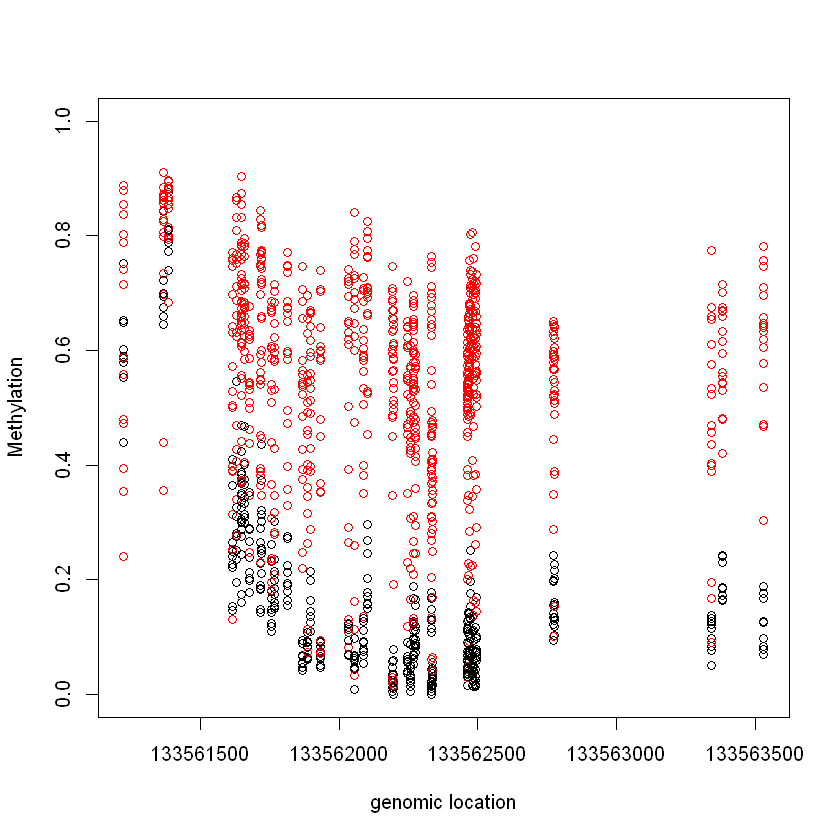

In [27]:
Index=(tab[1,7]-3):(tab[1,8]+3)
matplot(pos[Index],meth[Index,,drop=TRUE],col=cols,pch=1,xlab="genomic location",ylab="Methylation",ylim=c(0,1))

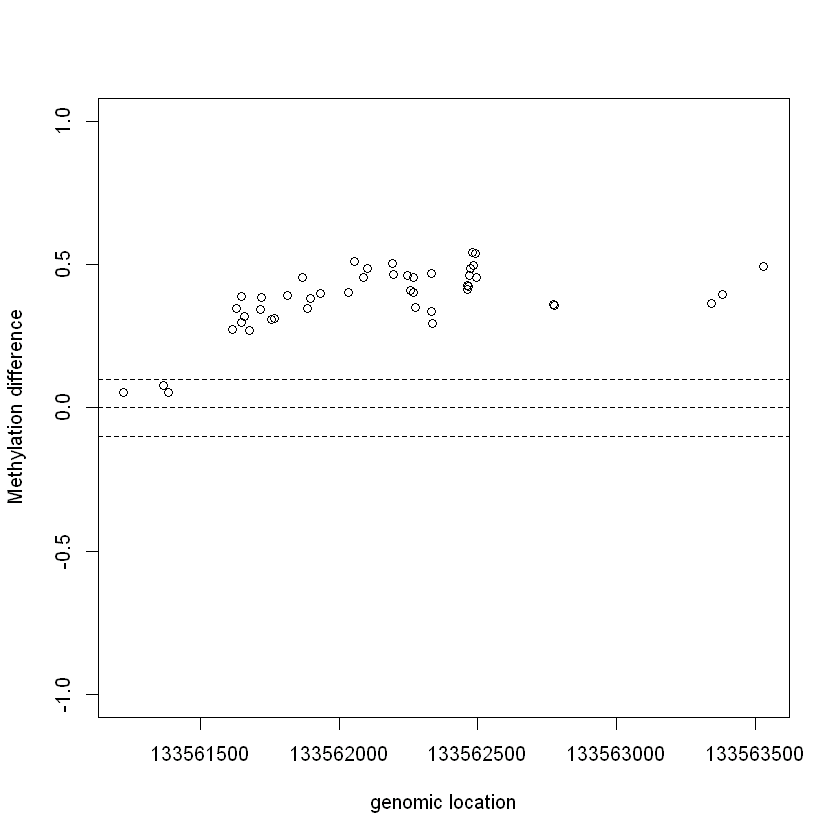

In [28]:
plot(pos[Index],res$fitted[Index,1],xlab="genomic location",ylab="Methylation difference",ylim=c(-1,1))
abline(h=c(-0.1,0,.1),lty=2)

- bumphunter()함수는 regions들에 대해서 smoothing과 permutation 기반으로 추론을 수행함.
- 그러나, 병렬처리 능력이 없는 옵션을 가지고 이 함수를 실행하는 것은 추천하지 않음

## 02. Reading 450K idat files with the minfi package
- 이번절에서 illumina 450K DNA methylation array부터 나온 idat 파일들을 어떻게 읽지는 설명함.
- minfi 패키지를 사용함.
- minfi  :  Tools for analyzing and visualizing Illumina's 450k array data.

In [ ]:
biocLite(c('minfi','IlluminaHumanMethylation450kmanifest','IlluminaHumanMethylation450kanno.ilmn12.hg19'))

In [29]:
library(minfi)

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.

Loading required package: lattice
Loading required package: Biostrings
Loading required package: XVector
Setting options('download.file.method.GEOquery'='auto')


- 첫번재 과정은 idat 파일의 basename을 결정임.
- 각각의 샘플을 빨간과 녹색 채널을 반영하도록 2개의 파일로 구성됨.
-  https://github.com/genomicsclass/rawdata/tree/master/idats 에서 다운받을 수 있음.

In [ ]:
# setwd("D:/Work_R/R-Project/99_ipython/02_질병유전체분석")

In [30]:
path <- "idats"
list.files(path)

[1] "5775041065_R01C02_Grn.idat" "5775041065_R01C02_Red.idat"
 [3] "5775041065_R04C01_Grn.idat" "5775041065_R04C01_Red.idat"
 [5] "5775041068_R01C02_Grn.idat" "5775041068_R01C02_Red.idat"
 [7] "5775041068_R04C01_Grn.idat" "5775041068_R04C01_Red.idat"
 [9] "5775041068_R06C01_Grn.idat" "5775041068_R06C01_Red.idat"
[11] "5775041084_R01C01_Grn.idat" "5775041084_R01C01_Red.idat"
[13] "targets.csv"

- csv파일안에서는 임상정보가 포함되어 있음.
- 엑셀로 파일을 열어보면, 한 열에 하나의 샘플 정보는 표현되고,  행에는 basenames가 포함됨.

In [31]:
targets <- read.csv("idats/targets.csv", as.is = TRUE)
names(targets)
targets$Basename

[1] "X"                                                                
  [2] "bcr_patient_barcode"                                              
  [3] "bcr_sample_uuid"                                                  
  [4] "bcr_sample_barcode"                                               
  [5] "NCNNCT_OthMethONSP"                                               
  [6] "current_weight"                                                   
  [7] "days_to_collection"                                               
  [8] "days_to_sample_procurement"                                       
  [9] "freezing_method"                                                  
 [10] "initial_weight"                                                   
 [11] "intermediate_dimension"                                           
 [12] "longest_dimension"                                                
 [13] "lymphatic_invasion"                                               
 [14] "margins_involved"                                                 
 [15] "method_of_sample_procurement"                                     
 [16] "number_regional_lymphnodes_exam"                                  
 [17] "number_regional_lymphnodes_pos"                                   
 [18] "oct_embedded"                                                     
 [19] "pathology_report_uuid"                                            
 [20] "primary_or_metastatic_status"                                     
 [21] "sample_type"                                                      
 [22] "sample_type_id"                                                   
 [23] "shortest_dimension"                                               
 [24] "time_between_clamping_and_freezing"                               
 [25] "time_between_excision_and_freezing"                               
 [26] "venous_invasion"                                                  
 [27] "verification_by_bcr"                                              
 [28] "vial_number.sample"                                               
 [29] "bcr_patient_barcode.tumor"                                        
 [30] "tumor_necrosis_percent"                                           
 [31] "tumor_nuclei_percent"                                             
 [32] "tumor_weight"                                                     
 [33] "vial_number.tumor"                                                
 [34] "bcr_patient_barcode.normal"                                       
 [35] "days_to_normal_sample_procurement"                                
 [36] "method_of_normal_sample_procurement"                              
 [37] "normal_control_type"                                              
 [38] "normal_tissue_anatomic_site"                                      
 [39] "normal_tissue_proximity"                                          
 [40] "vial_number"                                                      
 [41] "ncedna_dna_conc"                                                  
 [42] "ncedna_dna_qm"                                                    
 [43] "ncedna_dna_qty"                                                   
 [44] "ncedna_dna_vol"                                                   
 [45] "patient.age_at_initial_pathologic_diagnosis"                      
 [46] "patient.ajcc_cancer_staging_handbook_edition"                     
 [47] "patient.anatomic_organ_subdivision"                               
 [48] "patient.anatomic_site_colorectal"                                 
 [49] "patient.bcr_patient_uuid"                                         
 [50] "patient.braf_gene_analysis_performed"                             
 [51] "patient.braf_gene_analysis_result"                                
 [52] "patient.circumferential_resection_margin"                         
 [53] "patient.colon_polyps_present"                                     
 [54] "patient.date_of_form_completion"                                  
 [55] 

[1] "5775041065_R01C02" "5775041068_R01C02" "5775041065_R04C01"
[4] "5775041068_R04C01" "5775041068_R06C01" "5775041084_R01C01"

- targets$Basename 와 실제 경로가 일치하지 않으므로, 실제 경로로 수정함.
- read.450k() 함수로 rawdata을 읽어들임.

In [32]:
targets$Basename <- file.path(path, targets$Basename)
rgset <- read.450k(targets$Basename, verbose = TRUE)

[read.450k] Reading 5775041065_R01C02_Grn.idat 


Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽

[read.450k] Reading 5775041068_R01C02_Grn.idat 


Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽

[read.450k] Reading 5775041065_R04C01_Grn.idat 


Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽

[read.450k] Reading 5775041068_R04C01_Grn.idat 


Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽

[read.450k] Reading 5775041068_R06C01_Grn.idat 


Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽

[read.450k] Reading 5775041084_R01C01_Grn.idat 


Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽

[read.450k] Reading 5775041065_R01C02_Red.idat 


Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽

[read.450k] Reading 5775041068_R01C02_Red.idat 


Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽

[read.450k] Reading 5775041065_R04C01_Red.idat 


Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽

[read.450k] Reading 5775041068_R04C01_Red.idat 


Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽

[read.450k] Reading 5775041068_R06C01_Red.idat 


Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽

[read.450k] Reading 5775041084_R01C01_Red.idat 


Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = 4): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다Warning message:
In readChar(con, nchars = n): UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽

[read.450k] Read idat files in  7.45 seconds
[read.450k] Creating data matrices ... done in 0.27 seconds
[read.450k] Instantiating final object ... done in 1.54 seconds


In [33]:
pData(rgset) <- targets
dim(getRed(rgset))
dim(getGreen(rgset))

[1] 622399      6

[1] 622399      6

- 여기서는 전처리 알고리즘을 설명하지 않고, 바로 이미 만들어진 전처리 알고리즘을 사용하고 methylation 평가하는 과정으로 바로 진행함.
- Illumina에서 개발된 전처리 알고리즘으로 수행하고, 각각의 CpG의 location과 genome과 맵핑을 수행함.
- Minfi패키지는 genome annotation이 변경되어도 쉽게 맵핑정보를 업데이트하도록 정보 모듈형식으로 구성됨.

In [34]:
mset <- preprocessIllumina(rgset)

Loading required package: IlluminaHumanMethylation450kmanifest


In [35]:
mset <- mapToGenome(mset)

Loading required package: IlluminaHumanMethylation450kanno.ilmn12.hg19


In [36]:
dim(getBeta(mset, type = "Illumina"))  ##the argument type='Illumina' gives us default procedure

[1] 485512      6

In [37]:
head(granges(mset))

GRanges object with 6 ranges and 0 metadata columns:
             seqnames         ranges strand
                <Rle>      <IRanges>  <Rle>
  cg13869341     chr1 [15865, 15865]      *
  cg14008030     chr1 [18827, 18827]      *
  cg12045430     chr1 [29407, 29407]      *
  cg20826792     chr1 [29425, 29425]      *
  cg00381604     chr1 [29435, 29435]      *
  cg20253340     chr1 [68849, 68849]      *
  -------
  seqinfo: 24 sequences from hg19 genome; no seqlengths

- getSex()와 getQC()와 같은 함수를 사용해보자.
- getSex() : Estimates samples sex based on methylation data.
- getQC() : Estimate sample-specific quality control (QC) for methylation data.

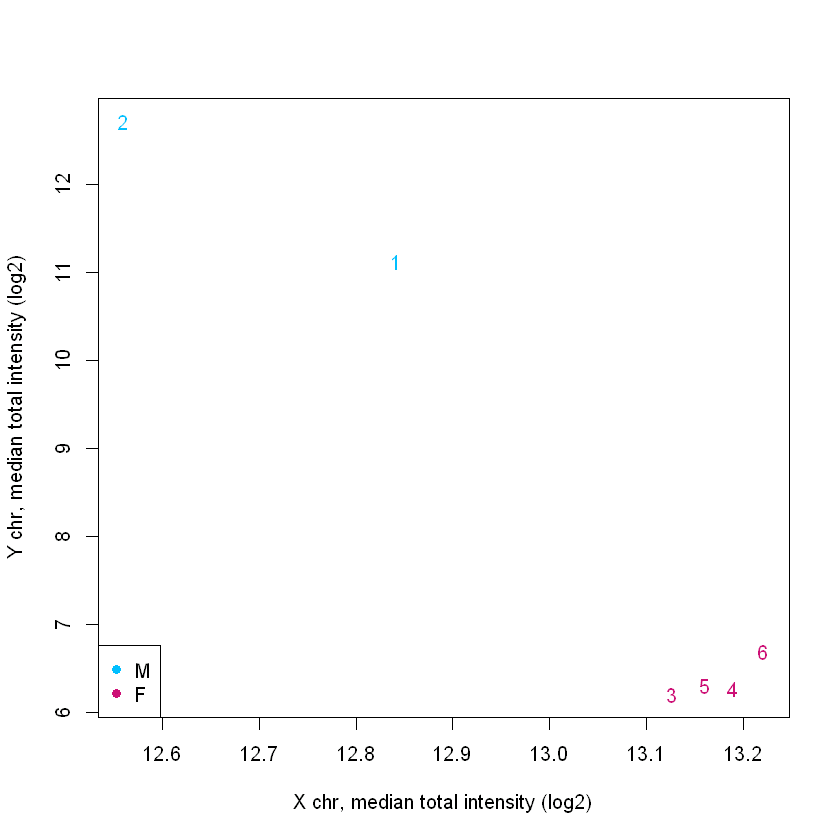

In [38]:
sex <- getSex(mset)
plotSex(sex)

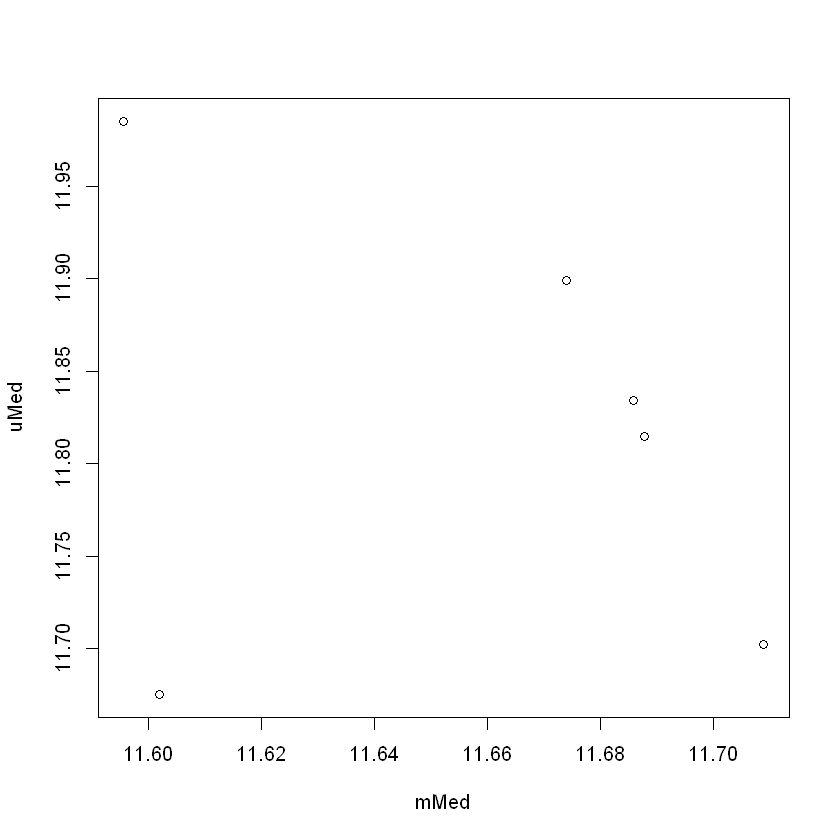

In [39]:
plot(as.matrix(getQC(mset)))

## 03절 Interactive visualization of DNA methylation data analysis

### contributed by Héctor Corrada Bravo
- interactive genomics data visualization 어플인 epiviz 을 사용해서 methylation data analysis 결과를 어떻게 시각화하는지 알아보자.

In [ ]:
biocLite("epivizr")

In [40]:
library(epivizr)

Loading required package: rtracklayer


- 이전 데이터셋을 활용.
- 아래 코드들은 필요한 여러가지 객체를 모아놓은 환경임.

In [41]:
library(coloncancermeth)
data(coloncancermeth)
library(limma)

In [42]:
X<-model.matrix(~pd$Status)
fit<-lmFit(meth,X)
eb <- ebayes(fit)
library(bumphunter)

In [43]:
chr=as.factor(seqnames(gr))
pos=start(gr)
cl=clusterMaker(chr,pos,maxGap=500)
res<-bumphunter(meth,X,chr=chr,pos=pos,cluster=cl,cutoff=0.1,B=0)

[bumphunterEngine] Using a single core (backend: doSEQ, version: 1.4.2).
[bumphunterEngine] Computing coefficients.
[bumphunterEngine] Finding regions.
[bumphunterEngine] Found 68682 bumps.


In [44]:
# the result of using limma and eBayes at the single CpG level
head(fit$coef)

(Intercept) pd$Statuscancer
cg13869341  0.87368481   -0.0204296005
cg14008030  0.64919916   -0.0098392233
cg12045430  0.05552658    0.0560399773
cg20826792  0.19228286    0.0243989120
cg00381604  0.01733199    0.0008441847
cg20253340  0.54700596   -0.0482179423

In [45]:
head(eb$t)

(Intercept) pd$Statuscancer
cg13869341   72.059399      -1.3624906
cg14008030   46.985495      -0.5758170
cg12045430    6.131217       5.0035875
cg20826792   20.854881       2.1398108
cg00381604    5.167479       0.2035192
cg20253340   18.996669      -1.3540412

In [46]:
# the result of running bumphunter
head(res$fitted)

[,1]
cg13869341 -0.0204296005
cg14008030 -0.0098392233
cg12045430  0.0560399773
cg20826792  0.0243989120
cg00381604  0.0008441847
cg20253340 -0.0482179423

In [47]:
head(res$table)

chr     start       end     value     area cluster indexStart indexEnd
6158  chr6 133561614 133562776 0.4048535 16.19414   77677     180994   181033
6568  chr7  27182493  27185282 0.3023301 15.41883   83616     195992   196042
5566  chr6  29520698  29521803 0.3798166 14.81285   71534     158794   158832
8453 chr10   8094093   8098005 0.2407042 14.20155  110074     251746   251804
9015 chr10 118030848 118034357 0.3844899 11.53470  117242     267198   267227
5698  chr6  32063774  32064945 0.2798026 11.19210   72201     165924   165963
      L clusterL
6158 40       43
6568 51       53
5566 39       40
8453 59       60
9015 30       30
5698 40       73

In [48]:
# the CpG location object
show(gr)

GRanges object with 485512 ranges and 0 metadata columns:
             seqnames               ranges strand
                <Rle>            <IRanges>  <Rle>
  cg13869341     chr1       [15865, 15865]      *
  cg14008030     chr1       [18827, 18827]      *
  cg12045430     chr1       [29407, 29407]      *
  cg20826792     chr1       [29425, 29425]      *
  cg00381604     chr1       [29435, 29435]      *
         ...      ...                  ...    ...
  cg17939569     chrY [27009430, 27009430]      *
  cg13365400     chrY [27210334, 27210334]      *
  cg21106100     chrY [28555536, 28555536]      *
  cg08265308     chrY [28555550, 28555550]      *
  cg14273923     chrY [28555912, 28555912]      *
  -------
  seqinfo: 24 sequences from hg19 genome; no seqlengths


- epivizr 패키지는 데이터를 시각화하기 위해서 GRange을 사용함.
- Grange는 시각화할 CpG level estimates이 포함함.

In [49]:
cpgGR <- gr
cpgGR$fitted <- round(res$fitted,digits=3)

- bumphunter 패키지의 결과가 포함된 다른 GRange 객체를 생성

In [50]:
dmrGR <- with(res$table,GRanges(chr,IRanges(start,end),area=area,value=value))

# let's add an annotation for "hypo-" or "hyper-" methylation (as long as the difference is large enough)
dmrGR$type <- ifelse(abs(dmrGR$value)<0.2, "neither", ifelse(dmrGR$value<0,"hypo","hyper"))
table(dmrGR$type)


  hyper    hypo neither 
   5141   18865   44676 

- epiviz패키지로 시각화 준비를 마침.
- epiviz session을 시작함.

In [51]:
mgr <- startEpiviz(workspace="mi9NojjqT1l_braveji")

In [ ]:
mgr$service()

[epivizr] Serving Epiviz, escape to continue interactive session...


In [18]:
hypoTrack <- mgr$addDevice(subset(dmrGR,dmrGR$type=="hypo"), "Hypo-methylated")
hyperTrack <- mgr$addDevice(subset(dmrGR,dmrGR$type=="hyper"), "Hyper-methylated")

[epivizr] Measurement Hypo-methylated added to browser and connected


> 

[epivizr] Chart epivizChart_1 added to browser and connected


> 

[epivizr] Measurement Hyper-methylated added to browser and connected


> 

[epivizr] Chart epivizChart_2 added to browser and connected


> 

In [19]:
diffTrack <- mgr$addDevice(cpgGR,"Meth difference",type="bp",columns="fitted")

[epivizr] Measurement Meth difference added to browser and connected


> 

[epivizr] Chart epivizChart_3 added to browser and connected


> 

In [20]:
colData <- DataFrame(name=c("M","A"))
rownames(colData) <- colData$name

rowData <- gr
rowData$cpg <- names(gr)

cpgSE <- SummarizedExperiment(rowData=rowData,
      assays=SimpleList(ma=cbind(fit$coef[,2],fit$Amean)),
      colData=colData)

Warning message:
: The 'rowData' argument is deprecated. Please use 'rowRanges' instead.

In [21]:
maPlot <- mgr$addDevice(cpgSE,columns=c("A","M"),"cpg MA")

[epivizr] Measurement cpg MA added to browser and connected


> 

[epivizr] Chart epivizChart_4 added to browser and connected


> 

In [ ]:
slideshowRegions <- dmrGR[1:10,] + 10000
mgr$slideshow(slideshowRegions, n=5)

Region 1 of 5 . Press key to continue (ESC to stop)...


[epivizr] Serving Epiviz, escape to continue interactive session...


In [ ]:
mgr$stopServer()

## 04절 Statistical Inference in the Analysis of DNA methylation Data



In [ ]:
library(minfi) ##Bioc

In [ ]:
install.packages("doParallel",  repos="http://cran.fhcrc.org" )

In [6]:
library(IlluminaHumanMethylation450kmanifest) ##Bioc
library(doParallel) ##CRAN
library(pkgmaker)

https://github.com/genomicsclass/tcgaMethylationSubset

In [ ]:
path="D:/Work_R/R-Project/99_ipython/tcgaMethylationSubset"
targets=read.delim(file.path (path,"targets.txt"),as.is=TRUE)
table(targets$Tissue,targets$Status)

In [9]:
index = which( targets$Status=="normal" & targets$Tissue%in%c("colon","lung") )
targets = targets[index,]

In [ ]:
dat = read.450k.exp(base=path,targets = targets, verbose=TRUE)

In [ ]:
dat = preprocessIllumina(dat)
dat = mapToGenome(dat)

In [12]:
dat = ratioConvert(dat,type="Illumina")

In [13]:
library(doParallel)
detectCores()

[1] 4

In [14]:
registerDoParallel(cores = 4)

In [ ]:
tissue =pData(dat)$Tissue
X= model.matrix(~tissue)
index = which(seqnames(dat)=="chr22")
dat = dat[index,] ## for illustrative purposes
res=bumphunter(dat,X,cutoff=0.1,B=1000)

In [ ]:
head(res$tab)

In [ ]:
biocLite("AnnotationHub")

In [ ]:
library(AnnotationHub)
cgi = AnnotationHub()[["AH5086"]]

In [ ]:
tab = res$tab[res$tab$fwer <= 0.05,]
tab = makeGRangesFromDataFrame(tab,keep.extra.columns = TRUE)

map=distanceToNearest(tab,cgi)
d = mcols(map)$dist
prop.table( table( cut(d,c(0,1,2000,5000,Inf),include.lowest=TRUE,right=FALSE) ))

In [ ]:
null =  granges(dat)
nulltab = makeGRangesFromDataFrame(null,keep.extra.columns = TRUE)

nullmap=distanceToNearest(nulltab,cgi)
nulld = mcols(nullmap)$dist
prop.table( table( cut(nulld,c(0,1,2000,5000,Inf),include.lowest=TRUE,right=FALSE) ))

In [ ]:
beta = getBeta(dat)
cols = as.factor(pData(dat)$Tissue)

tab = tab[order(-mcols(tab)$area)]
tab = tab+3000 ##add 3000 to each side

i=17
dataIndex = which(granges(dat)%over%tab[i])
cgiIndex = which(cgi%over%tab[i])
thecgi = cgi[cgiIndex]
    
pos = start(dat)[dataIndex]
xlim=range(c(pos,start(thecgi),end(thecgi)) )
  
y = beta[dataIndex,]
  
matplot(pos,y,col=as.numeric(cols) , xlim=xlim, ylim=c(0,1),ylab="Methylation")  
apply(cbind(start(thecgi),end(thecgi)),1,function(x) segments(x[1],0,x[2],0,lwd=4,col=3))

In [ ]:
plot(pos,res$fitted[dataIndex],xlim=xlim,ylim=c(-0.4,0.4))
abline(h=0)
apply(cbind(start(thecgi),end(thecgi)),1,function(x) segments(x[1],0,x[2],0,lwd=4,col=3))

In [ ]:
table(getIslandStatus(dat))